<h1>Name:- Raj Khatri<br>
Roll Number:- AC-1235<br>
Subject:- Data Mining<br>
Semester:- 6<br>
Practical - 5</h1>

In [145]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [146]:
df = pd.read_csv("BreastCancer.csv")


In [147]:
df.drop(columns="Unnamed: 32", inplace=True)
df.drop(columns="id", inplace=True)


In [148]:
df.isna().sum().sum()


0

In [149]:
X = df.drop(columns="diagnosis")
y = df.diagnosis


#### NAIVE BAYES

In [150]:
accuracy_list = []


In [151]:
def Naive_Bayes(X_train, X_test, y_train, y_test):
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    naive_accuracy = accuracy_score(y_test, y_pred)*100
    accuracy_list.append(naive_accuracy)
    print("Accuracy using Naive Bayes: ", naive_accuracy)


#### K-NEAREST NEIGHBOR

In [152]:
def KNN(X_train, X_test, y_train, y_test):
    classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    knn_accuracy = accuracy_score(y_test, y_pred)*100
    accuracy_list.append(knn_accuracy)
    print("Accuracy using KNN: ", knn_accuracy)


#### DECISION TREE

In [153]:
def decision_tree(X_train, X_test, y_train, y_test):
    dtree = DecisionTreeClassifier()
    dtree = dtree.fit(X_train, y_train)
    y_pred = dtree.predict(X_test)
    dec_accuracy = accuracy_score(y_test, y_pred)*100
    accuracy_list.append(dec_accuracy)
    print("Accuracy using decision tree: ", dec_accuracy)


#### HOLD-OUT METHOD
##### Training set = 75% Test set = 25%

In [154]:
X_train_75, X_test_25, y_train_75, y_test_25 = train_test_split(
    X, y, test_size=0.25, random_state=0)

# CALCULATING ACCURACY USING NAIVE BAYES
Naive_Bayes(X_train_75, X_test_25, y_train_75, y_test_25)

# CALCULATING ACCURACY USING KNN
KNN(X_train_75, X_test_25, y_train_75, y_test_25)

# CALCULATING ACCURACY USING decision tree
decision_tree(X_train_75, X_test_25, y_train_75, y_test_25)


Accuracy using Naive Bayes:  93.7062937062937
Accuracy using KNN:  93.7062937062937
Accuracy using decision tree:  88.81118881118881


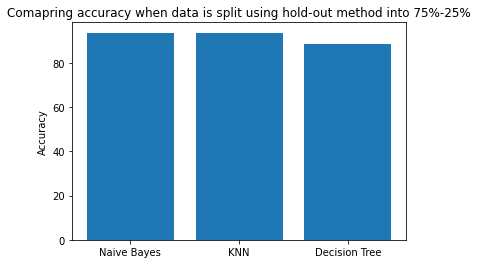

In [155]:
algo = ['Naive Bayes', 'KNN', 'Decision Tree']
plt.bar(algo, accuracy_list)
plt.ylabel("Accuracy")
plt.title("Comapring accuracy when data is split using hold-out method into 75%-25%")
accuracy_list.clear()


##### Training set = 66% Test set = 33%

In [156]:
X_train_66, X_test_33, y_train_66, y_test_33 = train_test_split(
    X, y, test_size=0.33, random_state=0)

# CALCULATING ACCURACY USING NAIVE BAYES
Naive_Bayes(X_train_66, X_test_33, y_train_66, y_test_33)

# CALCULATING ACCURACY USING KNN
KNN(X_train_66, X_test_33, y_train_66, y_test_33)

# CALCULATING ACCURACY USING decision tree
decision_tree(X_train_66, X_test_33, y_train_66, y_test_33)


Accuracy using Naive Bayes:  92.02127659574468
Accuracy using KNN:  94.68085106382979
Accuracy using decision tree:  93.08510638297872


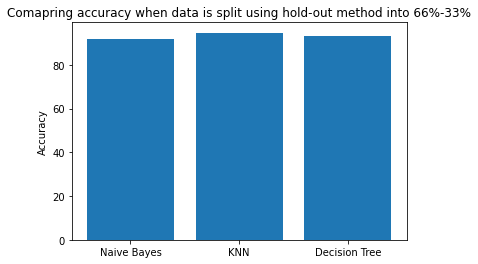

In [157]:
algo = ['Naive Bayes', 'KNN', 'Decision Tree']
plt.bar(algo, accuracy_list)
plt.ylabel("Accuracy")
plt.title("Comapring accuracy when data is split using hold-out method into 66%-33%")
accuracy_list.clear()


#### RANDOM SUBSAMPLING METHOD
##### Training set = 75% Test set = 25%

In [158]:
k = 5  # Count of random selection of samples
for i in range(k):
    X_train_75, X_test_25, y_train_75, y_test_25 = train_test_split(
        X, y, test_size=0.25, random_state=0)

# CALCULATING ACCURACY USING NAIVE BAYES
Naive_Bayes(X_train_75, X_test_25, y_train_75, y_test_25)

# CALCULATING ACCURACY USING KNN
KNN(X_train_75, X_test_25, y_train_75, y_test_25)

# CALCULATING ACCURACY USING decision tree
decision_tree(X_train_75, X_test_25, y_train_75, y_test_25)


Accuracy using Naive Bayes:  93.7062937062937
Accuracy using KNN:  93.7062937062937
Accuracy using decision tree:  86.7132867132867


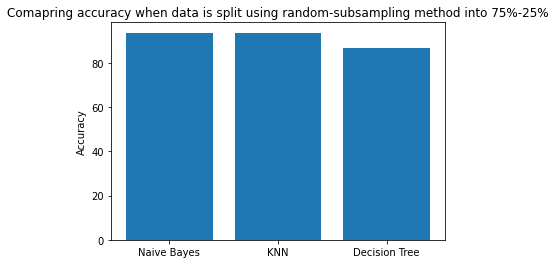

In [159]:
algo = ['Naive Bayes', 'KNN', 'Decision Tree']
plt.bar(algo, accuracy_list)
plt.ylabel("Accuracy")
plt.title(
    "Comapring accuracy when data is split using random-subsampling method into 75%-25%")
accuracy_list.clear()


##### Training set = 66% Test set = 33%

In [160]:
k = 5  # Count of random selection of samples
for i in range(k):
    X_train_66, X_test_33, y_train_66, y_test_33 = train_test_split(
        X, y, test_size=0.33, random_state=0)

# CALCULATING ACCURACY USING NAIVE BAYES
Naive_Bayes(X_train_66, X_test_33, y_train_66, y_test_33)

# CALCULATING ACCURACY USING KNN
KNN(X_train_66, X_test_33, y_train_66, y_test_33)

# CALCULATING ACCURACY USING decision tree
decision_tree(X_train_66, X_test_33, y_train_66, y_test_33)


Accuracy using Naive Bayes:  92.02127659574468
Accuracy using KNN:  94.68085106382979
Accuracy using decision tree:  91.48936170212765


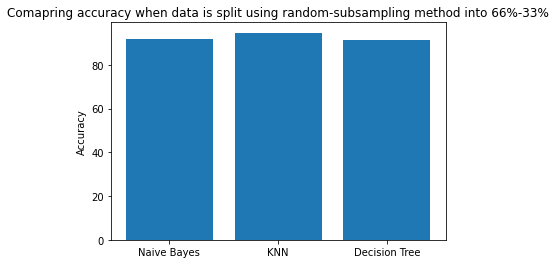

In [161]:
algo = ['Naive Bayes', 'KNN', 'Decision Tree']
plt.bar(algo, accuracy_list)
plt.ylabel("Accuracy")
plt.title(
    "Comapring accuracy when data is split using random-subsampling method into 66%-33%")
accuracy_list.clear()


5.3 Data is scaled to standard format

In [162]:
object = StandardScaler()
# standardization
scale = object.fit_transform(X_train)
print(scale)


[[-0.64350608 -0.1732254  -0.57145922 ...  0.6380906   3.01691484
   3.06757596]
 [-0.6290611   0.40451472 -0.63604484 ... -0.4871051   0.28613228
  -0.59251465]
 [ 2.60661367  0.09108486  2.53913488 ...  1.76062848  0.01564551
  -0.63312744]
 ...
 [-0.86306972 -1.10649789 -0.89522606 ... -1.10575167 -1.61375381
  -0.61336987]
 [-0.46438837 -1.54623531 -0.53371438 ... -1.35996429 -1.0015143
  -0.769784  ]
 [ 0.93388537 -0.55214806  0.89933133 ...  1.12431523  0.3881722
  -0.17431267]]
